<h2>Explainable AI Project for Extreme Gradient Boosting with SHAP analysis and LIME techniques to predict Bankruptcy</h2>

The project utilizes the Explainable AI to define the possible applications for business.

In [1]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\X\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('./data/archive.zip', compression='zip')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


<h2>Testing target-feature correlation</h2>
In order to filter out features that may cause inconsistency, we must analyze the target-feature correlation and remove variables that exhibit weak correlation with dependent variable

In [5]:
from scipy.stats import pointbiserialr


for x in df:
    if df[x].name != 'Bankrupt?':
        n = pointbiserialr(df[x], df['Bankrupt?']) 
        if n.pvalue < 0.05:

            df = df.drop([x], axis=1)
    

c:\Users\X\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5535: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [6]:
df.corr(method='pearson')

,Bankrupt?,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Total income/Total expense,Current Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Current Liability to Liability,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag
Bankrupt?,1.000000,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.023063,-0.004692,-0.000458,...,-0.007137,0.011929,-0.002894,-0.018035,0.000479,-0.020809,-0.005547,0.010508,-0.005509,NaN
Operating Profit Rate,-0.000230,1.000000,0.916448,0.862191,-0.592006,0.915544,0.013246,0.002784,-0.044460,0.000831,...,0.002047,0.008117,-0.229568,0.016485,-0.084747,0.020520,0.000199,0.000935,0.000393,NaN
Pre-tax net Interest Rate,-0.008517,0.916448,1.000000,0.986379,-0.220045,0.993617,0.014247,0.004031,0.004931,0.001246,...,0.003322,0.008065,0.090689,0.015581,0.233675,0.019009,-0.000075,0.000855,0.000984,NaN
After-tax net Interest Rate,-0.008857,0.862191,0.986379,1.000000,-0.115211,0.984452,0.013982,0.003824,0.005594,0.001226,...,0.002985,0.008174,0.244911,0.015792,0.379952,0.013732,-0.001091,0.000927,0.000957,NaN
Non-industry income and expenditure/revenue,-0.016593,-0.592006,-0.220045,-0.115211,1.000000,-0.230698,-0.003597,0.001332,0.118316,0.000484,...,0.001701,-0.003545,0.742290,-0.008805,0.677230,-0.011739,-0.000637,-0.000556,0.001024,NaN
Continuous interest rate (after tax),-0.008395,0.915544,0.993617,0.984452,-0.230698,1.000000,0.013168,0.003654,0.051607,0.001207,...,0.003094,0.007518,0.110703,0.014596,0.254886,0.014602,-0.000556,0.000774,0.000798,NaN
Operating Expense Rate,-0.006083,0.013246,0.014247,0.013982,-0.003597,0.013168,1.000000,-0.006011,-0.015838,-0.008170,...,-0.001955,0.170776,-0.003331,0.040730,0.003082,-0.013653,0.006497,0.013577,0.006232,NaN
Interest-bearing debt interest rate,-0.023063,0.002784,0.004031,0.003824,0.001332,0.003654,-0.006011,1.000000,-0.003904,-0.003299,...,-0.000202,-0.009759,0.000607,-0.019243,0.000173,0.025009,0.003175,-0.007301,-0.000779,NaN
Revenue Per Share (Yuan ¥),-0.004692,-0.044460,0.004931,0.005594,0.118316,0.051607,-0.015838,-0.003904,1.000000,0.000192,...,-0.000558,-0.010894,0.184916,-0.021618,0.037165,-0.027977,0.027256,-0.001140,-0.000053,NaN
Realized Sales Gross Profit Growth Rate,-0.000458,0.000831,0.001246,0.001226,0.000484,0.001207,-0.008170,-0.003299,0.000192,1.000000,...,-0.000307,0.019388,0.000023,-0.009126,-0.000182,0.016519,-0.000764,-0.000672,-0.000327,NaN


<h3>Correlation matrix reveals the highly features among explaining variables. Even though Extreme Boosting applies regularization by default, we should remove those with too high values for further computation purposes. As correlation has to be kept weak, we can set low threshold of 0.3 of correlation</h3>

In [7]:
import numpy as np

def drop_highly_correlated(df, threshold=0.3):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop)

df = drop_highly_correlated(df)

df.head(5)

,Bankrupt?,Operating Profit Rate,Operating Expense Rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Current Ratio,Interest Expense Ratio,...,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Cash Turnover Rate,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag
0,1,0.998969,1.256969e-04,0.000725,0.017560,0.022102,0.848195,0.217535,0.002259,0.629951,...,0.276920,0.001036,0.676269,0.025592,7.010000e+08,4.580000e+08,0.622879,0.026601,0.564050,1
1,1,0.998946,2.897851e-04,0.000647,0.021144,0.022080,0.848088,0.217620,0.006016,0.635172,...,0.289642,0.005210,0.308589,0.023947,1.065198e-04,2.490000e+09,0.623652,0.264577,0.570175,1
2,1,0.998857,2.361297e-04,0.000790,0.005944,0.022760,0.848094,0.217601,0.011543,0.629631,...,0.277456,0.013879,0.446027,0.003715,1.791094e-03,7.610000e+08,0.623841,0.026555,0.563706,1
3,1,0.998700,1.078888e-04,0.000449,0.014368,0.022046,0.848005,0.217568,0.004194,0.630228,...,0.276580,0.003540,0.615848,0.022165,8.140000e+09,2.030000e+09,0.622929,0.026697,0.564663,1
4,1,0.998973,7.890000e+09,0.000686,0.029690,0.022096,0.848258,0.217626,0.006022,0.636055,...,0.287913,0.004869,0.975007,0.000000,6.680000e+09,8.240000e+08,0.623521,0.024752,0.575617,1


In [8]:
#list of names for later
col_names = list(df)
col_names.remove('Bankrupt?')
print(col_names)
print(len(col_names))

[' Operating Profit Rate', ' Operating Expense Rate', ' Interest-bearing debt interest rate', ' Revenue Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Current Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Net Worth Turnover Rate (times)', ' Quick Assets/Current Liability', ' Inventory/Working Capital', ' Inventory/Current Liability', ' Current Liabilities/Liability', ' Long-term Liability to Current Assets', ' Current Asset Turnover Rate', ' Cash Turnover Rate', ' No-credit Interval', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net Income Flag']
26


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'Bankrupt?'], df['Bankrupt?'], test_size=0.3, random_state=42, stratify=df['Bankrupt?'])

<h2>Fitting transforms</h2>
<h3>Before training model we need to convert data to encoded format. The XGBoost is a robust model and can be used with outliers and overfitting.</h3>

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#We use label econder to encode target variable and standard scaler for explaining data
label_encoder = LabelEncoder()
scaler = StandardScaler()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
X_test

array([[ 0.02946968,  1.01079925, -0.15543824, ..., -0.09025386,
        -0.02219262,  0.        ],
       [ 0.04040895, -0.63127873, -0.15543824, ..., -0.08851795,
        -0.01929424,  0.        ],
       [ 0.03660225,  1.20650314, -0.15543824, ..., -0.07034248,
         0.00902419,  0.        ],
       ...,
       [-0.22352264, -0.63127873, -0.15543824, ..., -0.04406771,
         0.04434834,  0.        ],
       [ 0.02392659,  0.98939413, -0.15543824, ..., -0.15954509,
        -0.17726176,  0.        ],
       [ 0.03319625,  1.01385712, -0.15543824, ..., -0.05702321,
         0.02767624,  0.        ]])

In [19]:
train_loss, test_loss = list(), list()

<h2>Model Training</h2>
<h3>In order to swiftly find best configuration of hyperparameters we will use skopt library and apply Bayesian Search Cross Validation looking for most suitable combination of values by applying Bayes Theorem approach.</h3>

In [20]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

estimators = [
    ('clf', XGBClassifier(random_state=42)) #random state has to match th results from previous cells to maintain scores and data integrity
]

pipeline = Pipeline(steps=estimators)

pipeline

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

<h3>We search for 9 distinct parameters to optimize the Gradient Booster. Could be more but the computation gets more complex with each addition. Moreover we search in space of raw and oversampled data for comparison.</h3>

In [21]:
#search space for different parameters
search_space = {
    'clf__max_depth': Integer(2,10),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode': Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
    #add more if necessary
}

opt = BayesSearchCV(pipeline, search_space, cv=8, n_iter=50, scoring='roc_auc', random_state=42)

In [22]:
#testing/training
import numpy as np
x = XGBClassifier().fit(X_train, y_train)
opt.fit(X_train, y_train)

BayesSearchCV(cv=8,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       feature_weights=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       int...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

<h2>Optimizer evaluation</h2>
<h3>As the model is trained, we start to develop XAI methods to explain how the final result was achieved.</h3>

In [23]:
y_pred = opt.best_estimator_.named_steps['clf'].predict(X_test)

In [24]:
y_proba = opt.best_estimator_.named_steps['clf'].predict_proba(X_test)[:,1] #the function calculates values from 2 distinct "angles"

In [25]:
print(y_pred[0])
print(y_proba[0])

0
0.03558995


In [26]:
par = opt.best_estimator_.get_params()

print(par['clf'])


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=0.6063349710399608,
              colsample_bytree=0.7418124621128961, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0031453000459845874,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


In [27]:
from sklearn.metrics import roc_curve
print(roc_curve(y_test, y_pred))

(array([0., 1.]), array([0., 1.]), array([inf,  0.]))


opt.best_estimator_

<h2>Scoring</h2>
<h3>Determinant of coefficient comparison</h3>

The ROC-AUC Curve shows performance of 83%, which can be interpreted as high performance across all possible classification thresholds.

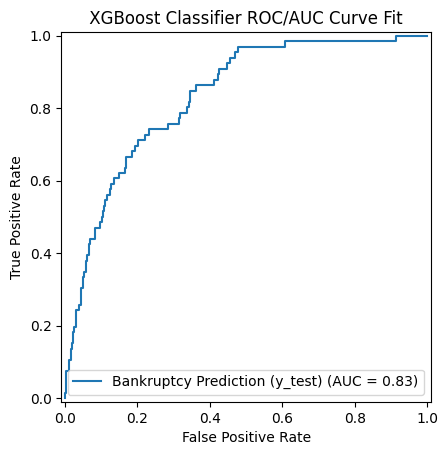

In [28]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, accuracy_score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Bankruptcy Prediction (y_test)')

display.plot()
plt.title(" XGBoost Classifier ROC/AUC Curve Fit ")
plt.show()

<h3>Accuracy Check</h3>

In [29]:
from sklearn.metrics import accuracy_score
import random

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 96.77%


<h2>Feature importance analysis</h2>
<h3>For final thoughts we use built-in XGBoost solutions including plot importance table to better explain the impact each of features has on the final output.
This allows us to further evaluate the model</h3>

When checking default feature importance, we can see the impact, but due to earlier processing of data, it's hard to fully grasp which feature has biggest impact.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

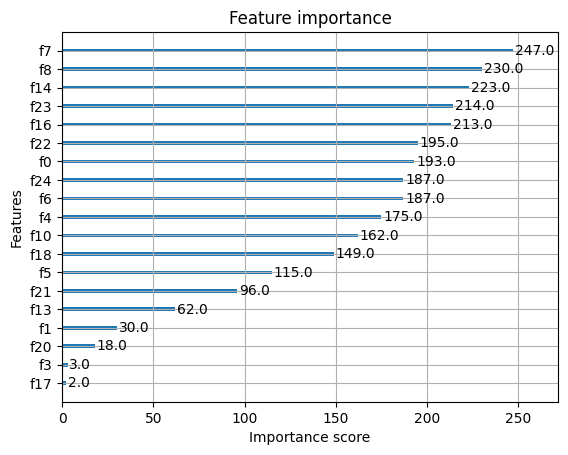

In [30]:
from xgboost import plot_importance

xgboost_model = opt.best_estimator_.named_steps['clf']

plot_importance(xgboost_model)

In [31]:
print(type(opt.best_estimator_.named_steps['clf']))
opt.best_estimator_.named_steps['clf']

<class 'xgboost.sklearn.XGBClassifier'>


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1.0, colsample_bynode=0.6063349710399608,
              colsample_bytree=0.7418124621128961, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0031453000459845874,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [32]:
print(opt.best_estimator_.named_steps['clf'].feature_importances_)

[0.05090812 0.03435143 0.         0.00256163 0.0311549  0.03320631
 0.03812239 0.09148216 0.09386599 0.         0.04942419 0.
 0.         0.03073632 0.0439518  0.         0.0537171  0.00380492
 0.03213142 0.         0.05553791 0.03629217 0.05747192 0.16444664
 0.09683269 0.        ]


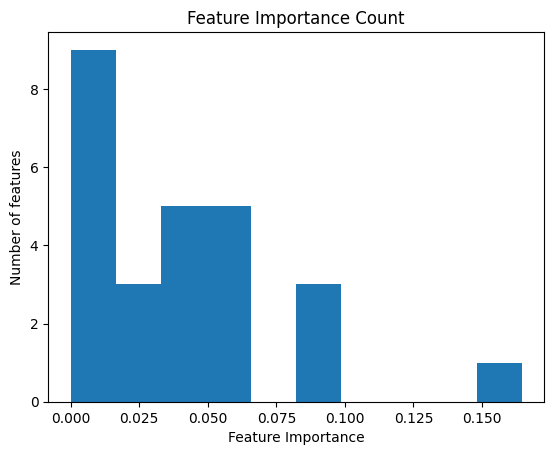

In [33]:
bringer = opt.best_estimator_.named_steps['clf'].feature_importances_
bringer = sorted(bringer)
plt.hist(bringer)
plt.title("Feature Importance Count")
plt.xlabel("Feature Importance")
plt.ylabel("Number of features")
plt.show()

In [34]:
bringer2 = list(filter(lambda a: a != 0, bringer))

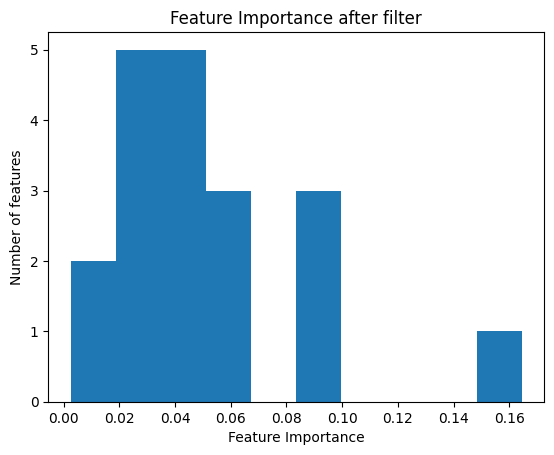

In [35]:
plt.hist(bringer2)
plt.title("Feature Importance after filter")
plt.xlabel("Feature Importance")
plt.ylabel("Number of features")
plt.show()

<h3>Shapes before and after splitting match so we can proceed to sampling from previously mentioned data<h3>

In [36]:
np.random.seed(42)
shap.initjs()

#wrong! Don't uncomment it!
#sampled_data = np.random.choice(X_train.flatten(), 100)
#sampled_data_smote = np.random.choice(X_train_smote.flatten(), 100)

<h2>Encode back the header to understand the data properly.</h2>

In [37]:
col_names

[' Operating Profit Rate',
 ' Operating Expense Rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Current Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Long-term fund suitability ratio (A)',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Net Worth Turnover Rate (times)',
 ' Quick Assets/Current Liability',
 ' Inventory/Working Capital',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' No-credit Interval',
 ' Degree of Financial Leverage (DFL)',
 ' Interest Coverage Ratio (Interest expense to EBIT)',
 ' Net Income Flag']

In [38]:
col_names = [item.replace(' Interest Coverage Ratio (Interest expense to EBIT)', ' Interest to Ebit') for item in col_names]
col_names

[' Operating Profit Rate',
 ' Operating Expense Rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' Continuous Net Profit Growth Rate',
 ' Current Ratio',
 ' Interest Expense Ratio',
 ' Total debt/Total net worth',
 ' Long-term fund suitability ratio (A)',
 ' Accounts Receivable Turnover',
 ' Average Collection Days',
 ' Inventory Turnover Rate (times)',
 ' Net Worth Turnover Rate (times)',
 ' Quick Assets/Current Liability',
 ' Inventory/Working Capital',
 ' Inventory/Current Liability',
 ' Current Liabilities/Liability',
 ' Long-term Liability to Current Assets',
 ' Current Asset Turnover Rate',
 ' Cash Turnover Rate',
 ' No-credit Interval',
 ' Degree of Financial Leverage (DFL)',
 ' Interest to Ebit',
 ' Net Income Flag']

In [39]:
X_train = scaler.inverse_transform(X_train)

X_train = pd.DataFrame(X_train)

sampled_data = X_train.sample(100, random_state=42)
sampled_data.set_axis(col_names, axis=1,inplace=True)
X_train.set_axis(col_names, axis=1,inplace=True)

sampled_data.head(10)

C:\Users\X\AppData\Local\Temp\ipykernel_17404\2100502501.py:6: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead

C:\Users\X\AppData\Local\Temp\ipykernel_17404\2100502501.py:7: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,Operating Profit Rate,Operating Expense Rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,Continuous Net Profit Growth Rate,Current Ratio,Interest Expense Ratio,Total debt/Total net worth,...,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Cash Turnover Rate,No-credit Interval,Degree of Financial Leverage (DFL),Interest to Ebit,Net Income Flag
33,0.998845,6.978506e+07,550437.959710,1.091829e+06,0.021909,0.848316,0.218161,-2.586886e+07,0.630334,1.946296e+06,...,0.272396,-3.001979e+06,0.888965,54593.049156,8.582575e+09,2.051714e+08,0.623694,0.026915,0.564608,1.0
555,0.998904,6.978506e+07,550437.959200,1.091829e+06,0.021095,0.848289,0.218295,-9.630466e+06,0.632831,1.946296e+06,...,0.277363,-3.001979e+06,0.572347,54593.060676,6.796061e+06,5.009622e+09,0.624360,0.027100,0.566861,1.0
4691,0.998905,6.978506e+07,550437.958849,1.091829e+06,0.021226,0.848283,0.218342,2.873578e+06,0.630851,1.946296e+06,...,0.277197,-3.001979e+06,0.981684,54593.049277,9.744752e+08,6.017963e+09,0.624352,0.026946,0.565266,1.0
3131,0.998833,6.978506e+07,550437.959327,1.091829e+06,0.030088,0.848346,0.218511,-4.695070e+06,0.630384,1.946296e+06,...,0.277023,-3.001979e+06,0.626753,54593.057628,6.796061e+06,-4.197108e+07,0.624126,0.026924,0.564826,1.0
3921,0.998846,6.978506e+07,550437.959401,1.091829e+06,0.023672,0.848346,0.218515,-4.857501e+06,0.630239,1.946296e+06,...,0.276844,-3.001979e+06,0.993449,54593.049156,6.796061e+06,4.653736e+09,0.608881,0.026908,0.564441,1.0
2114,0.998886,1.094645e+09,550437.959151,1.091829e+06,0.020772,0.848284,0.218334,-1.065659e+07,0.631500,1.946296e+06,...,0.278078,-3.001979e+06,0.796958,54593.053611,4.653272e+09,9.939443e+07,0.624035,0.026985,0.565852,1.0
4593,0.998892,6.978506e+07,550437.959342,1.091829e+06,0.021206,0.848281,0.218352,-1.466759e+06,0.630903,1.946296e+06,...,0.276721,-3.001979e+06,0.514686,54593.049156,6.796061e+06,5.207336e+09,0.624495,0.026950,0.565326,1.0
4627,0.998967,6.978506e+07,550437.962710,1.091829e+06,0.021438,0.848323,0.218578,4.314235e+07,0.630853,1.946296e+06,...,0.276564,-3.001979e+06,0.847888,54593.049156,6.796061e+06,-4.197108e+07,0.624600,0.026946,0.565268,1.0
471,0.998936,6.978506e+07,550437.958849,1.091829e+06,0.020854,0.848269,0.218347,7.476793e+07,0.630891,1.946296e+06,...,0.276312,-3.001979e+06,0.997052,54593.049156,6.796061e+06,-4.197108e+07,0.625355,0.026949,0.565314,1.0
2471,0.998905,6.978506e+07,550437.959827,1.091829e+06,0.021213,0.848276,0.218306,-6.922245e+06,0.641411,1.946296e+06,...,0.279377,-3.001979e+06,0.809441,54593.052823,6.796061e+06,2.350368e+09,0.623062,0.026997,0.565995,1.0


In [40]:
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(sampled_data)

<h2>SHAP explainers</h2>
<h3>This technique allows us to check the impact each of each feature. The obstacle is the number of features, which can be addressed by displaying relative force plot</h3>

In [41]:
shap.force_plot(explainer.expected_value, shap_values[3,:], sampled_data.iloc[3,:])

In [42]:
shap.force_plot(explainer.expected_value, shap_values[30,:], sampled_data.iloc[30,:])

In [43]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

<h3>Feature values for explaining the Booster model</h3>

C:\Users\X\AppData\Local\Temp\ipykernel_17404\2516788097.py:1: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



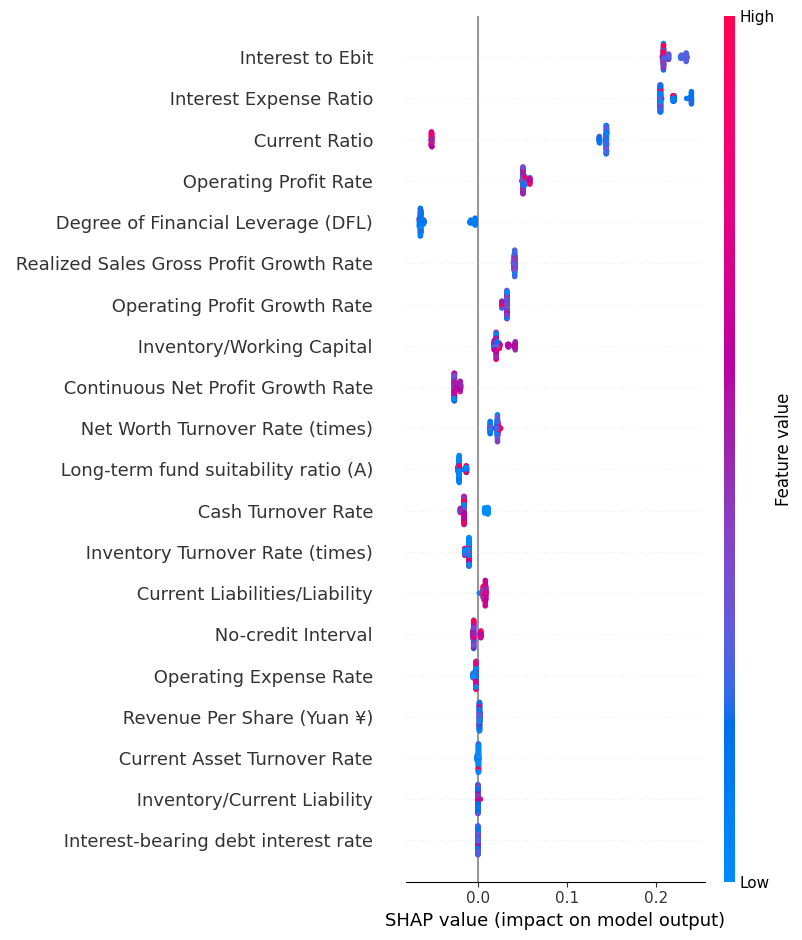

In [44]:
shap.summary_plot(shap_values, sampled_data)

C:\Users\X\AppData\Local\Temp\ipykernel_17404\2157091365.py:1: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



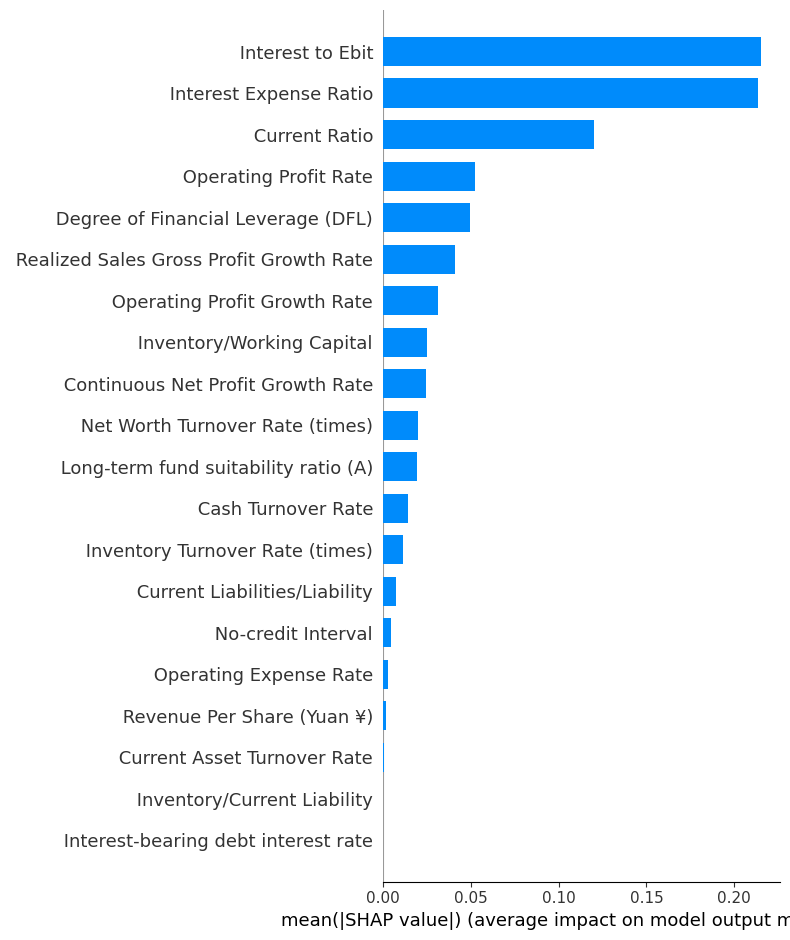

In [45]:
shap.summary_plot(shap_values, sampled_data, plot_type="bar")

<h2>LIME</h2>

<h3>We are trying to implement individual effects using LIME approach. Due to large number of rows we will determine 3 of them to showcase the potential. As the data we pick has censored names, it's impossible to determine what companies are facing bankruptcy. However in practice it would be very useful to analyze single case scenario.</h3>

In [46]:
fn = list(X_train.columns.values)
X_train_fits = scaler.fit_transform(X_train)

In [47]:
import lime
import lime.lime_tabular as tab

# Select a data point from the test set
instance_idx = [1, 2, 3]
instance = X_test[instance_idx[0]]
instance2 = X_test[instance_idx[1]]
instance3 = X_test[instance_idx[2]]

lime_explainer = tab.LimeTabularExplainer(
    X_train_fits, 
    feature_names=fn, 
    verbose=True, 
    discretize_continuous=True)

The LIME explanation illustrates the key factors influencing the model’s prediction of bankruptcy (class 1) for a specific company. The most influential features supporting the bankruptcy classification include a high degree of financial leverage (DFL ≤ -0.05), low continuous net profit growth rate (≤ 0.02), and a high interest expense ratio (≤ -0.03). These indicators suggest that the company is experiencing financial strain due to excessive debt, declining profitability, and burdensome interest expenses. Conversely, certain features oppose the bankruptcy prediction, such as a marginally positive current ratio, a reasonable no-credit interval, and a slightly favorable inventory-to-working-capital ratio. Additional features like a modest operating profit rate and long-term fund suitability ratio also work against the prediction but have relatively low influence. Overall, the model’s decision is largely driven by the company's weak financial structure and performance, which outweigh the few positive financial indicators present. The similar interpretation can be drawn from other 2 plots.

Intercept 0.03747994706276082
Prediction_local [0.04387135]
Right: 0.038332842


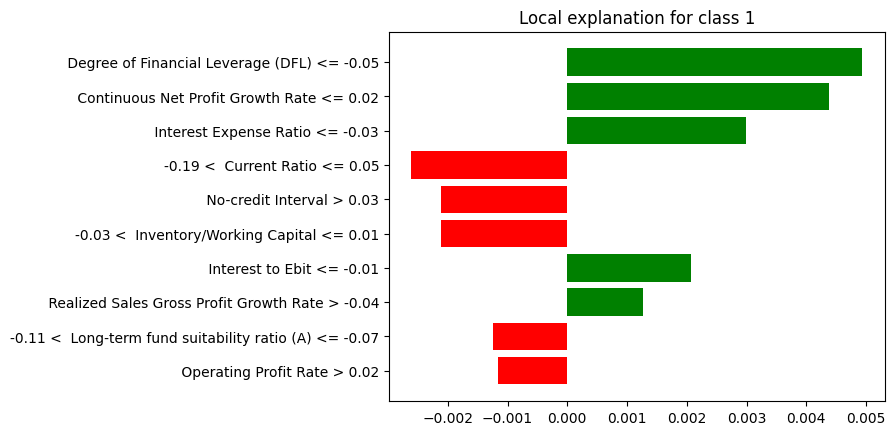

In [48]:
explanation = lime_explainer.explain_instance(instance, xgboost_model.predict_proba, num_features=10)

# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

Intercept 0.036141861822923144
Prediction_local [0.04838428]
Right: 0.036716677


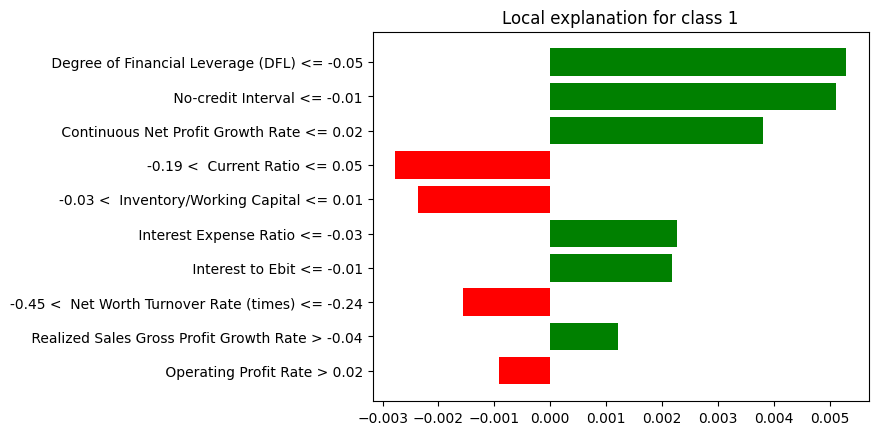

In [49]:
explanation = lime_explainer.explain_instance(instance3, xgboost_model.predict_proba, num_features=10)

# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

Intercept 0.04024899561785348
Prediction_local [0.03598161]
Right: 0.033826653


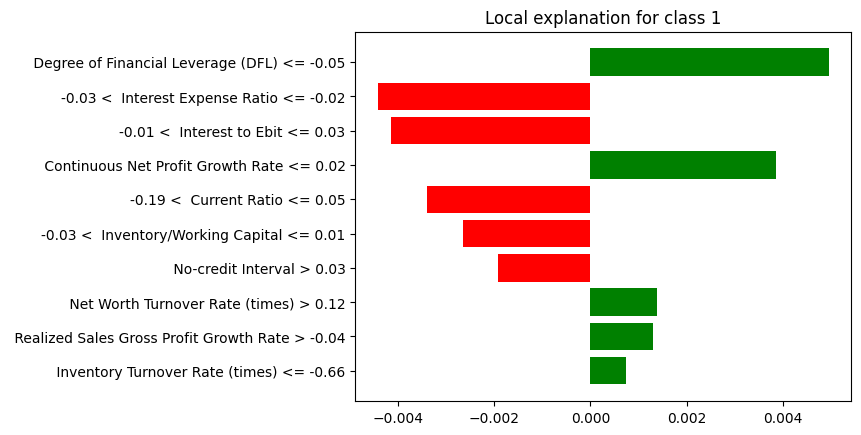

In [50]:
explanation = lime_explainer.explain_instance(instance2, xgboost_model.predict_proba, num_features=10)

# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

# Show the predictions
#explanation.show_in_notebook(show_table=True)

<h2>Ceteris Paribus Approach</h2>
<h3>For the sake of analyzing the variations of individual features, we can use Ceteris Paribus explainability to determine how does single change in one feature affects the instance of the model prediction</h3>

In [51]:
import dalex as dx


In [52]:
bankruptcy_rf_exp = dx.Explainer(xgboost_model, X_train, y_train, 
                    label = "Bankruptcy RF Pipeline")

Preparation of a new explainer is initiated

  -> data              : 4773 rows 26 cols
  -> target variable   : 4773 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Bankruptcy RF Pipeline
  -> predict function  : <function yhat_proba_default at 0x000001F9E0EFE700> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0424, mean = 0.0562, max = 0.0683
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0683, mean = -0.024, max = 0.948
  -> model_info        : package xgboost

A new explainer has been created!


<h3>The Ceteris Paribus plot reveals the change of instance prediction when one of the variables changes and the other remain the same. The Ceteris Paribus plot below reveals that majority of filtered variables won't affect the final model. The Bayesian Validation checks for the most prominent model in general but for individual cases we can conduct further diagnostics to lower possibility of getting bankrupt. Looking at variables we can clearly see that Continuous Profit Growth Rate, Interest ot Ebit and Degree of Financial Leverage can be further optimized by boosting its value. Inventory/Working Capital could be lowered to achieve similar results. This step has to be performed independently for each instance.</h3>

In [53]:
instance = X_test[[0]]
cp_profile = bankruptcy_rf_exp.predict_profile(new_observation=instance)
cp_profile.plot()


Calculating ceteris paribus: 100%|██████████| 26/26 [00:00<00:00, 204.72it/s]
c:\Users\X\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\cast.py:1134: RuntimeWarning:

invalid value encountered in cast



<h3>The function below saves the final model into separate folder as a .pkl file</h3>

In [54]:
import joblib, pickle

#joblib.dump(xgboost_model, '../frontend/bank/static/joblib_bankruptcy_predictor')
#with open('../docker-Image/pickle_bankruptcy_predictor.pkl', 'wb') as f:
    #pickle.dump(xgboost_model, f)

joblib.dump(xgboost_model, './saved_model/bankruptcy_predictor.pkl')

['./saved_model/bankruptcy_predictor.pkl']